#### Импортируем пакеты

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

#### Считываем данные из файлов

In [2]:
PD = pd.read_csv('player_data.csv')
PL = pd.read_csv('Players.csv')
SS = pd.read_csv('Seasons_Stats.csv')

#### Смотрим на таблицы

In [3]:
PL.head(3)

Unnamed: 0           Player  height  weight                   collage  \
0           0  Curly Armstrong   180.0    77.0        Indiana University   
1           1     Cliff Barker   188.0    83.0    University of Kentucky   
2           2    Leo Barnhorst   193.0    86.0  University of Notre Dame   

     born birth_city birth_state  
0  1918.0        NaN         NaN  
1  1921.0   Yorktown     Indiana  
2  1924.0        NaN         NaN

In [4]:
PD.head(3)

name  year_start  year_end position height  weight  \
0       Alaa Abdelnaby        1991      1995      F-C   6-10   240.0   
1      Zaid Abdul-Aziz        1969      1978      C-F    6-9   235.0   
2  Kareem Abdul-Jabbar        1970      1989        C    7-2   225.0   

       birth_date                                college  
0   June 24, 1968                        Duke University  
1   April 7, 1946                  Iowa State University  
2  April 16, 1947  University of California, Los Angeles

In [5]:
SS.head(3)

Unnamed: 0    Year           Player  Pos   Age   Tm     G  GS  MP  PER  \
0           0  1950.0  Curly Armstrong  G-F  31.0  FTW  63.0 NaN NaN  NaN   
1           1  1950.0     Cliff Barker   SG  29.0  INO  49.0 NaN NaN  NaN   
2           2  1950.0    Leo Barnhorst   SF  25.0  CHS  67.0 NaN NaN  NaN   

   ...    FT%  ORB  DRB  TRB    AST  STL  BLK  TOV     PF    PTS  
0  ...  0.705  NaN  NaN  NaN  176.0  NaN  NaN  NaN  217.0  458.0  
1  ...  0.708  NaN  NaN  NaN  109.0  NaN  NaN  NaN   99.0  279.0  
2  ...  0.698  NaN  NaN  NaN  140.0  NaN  NaN  NaN  192.0  438.0  

[3 rows x 53 columns]

In [6]:
# Формат таблиц
print('Size of Players table:', PL.shape)
print("Size of Players' Data table:", PD.shape)
print('Size of Statistics table:', SS.shape)

Size of Players table: (3922, 8)
Size of Players' Data table: (4550, 8)
Size of Statistics table: (24691, 53)


In [7]:
# Убедимся, что имена игроков уникальны (чтобы далее можно было мерджить по этому полю)
len(PL['Player'].unique())

3922

Видно, что количество уникальных игроков совпадает с количеством строк таблицы "Players", значит все имена уникальны
(можно мерджить)

То, что в таблице "Players' Data" содержится больше строк, чем игроков, объясняется, очевидно, тем, что один и тот же игрок мог выступать в различных позициях (поле "position")

In [8]:
# Посмотрим на списки полей по таблицам
print("Players:", PL.columns)
print("Players' Data:", PD.columns)
print("Statistics:", SS.columns)

Players: Index(['Unnamed: 0', 'Player', 'height', 'weight', 'collage', 'born',
       'birth_city', 'birth_state'],
      dtype='object')
Players' Data: Index(['name', 'year_start', 'year_end', 'position', 'height', 'weight',
       'birth_date', 'college'],
      dtype='object')
Statistics: Index(['Unnamed: 0', 'Year', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP',
       'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%',
       'BLK%', 'TOV%', 'USG%', 'blanl', 'OWS', 'DWS', 'WS', 'WS/48', 'blank2',
       'OBPM', 'DBPM', 'BPM', 'VORP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%',
       '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB',
       'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')


Замечаем, что таблица "Players' Data" не содержит принципиально отличных полей от тех, что содержатся совокупно в двух других (месяц и число рождения будем считать несущественными, поскольку не планируем строить астрологические модели, а year_start и year_end не несут новой информации в сравнении с Year). Поэтому попросту проигнорируем ее при смердживании двух других. При этом опустим "паразитные" колонки "Unnamed: 0".

#### Создаем объединенную таблицу

In [9]:
TAB = PL[PL.columns[1:]].merge(SS[SS.columns[1:]], left_on = 'Player', right_on = 'Player')

In [10]:
# Посмотрим на таблицу
TAB.head()

Player  height  weight                 collage    born birth_city  \
0  Curly Armstrong   180.0    77.0      Indiana University  1918.0        NaN   
1  Curly Armstrong   180.0    77.0      Indiana University  1918.0        NaN   
2     Cliff Barker   188.0    83.0  University of Kentucky  1921.0   Yorktown   
3     Cliff Barker   188.0    83.0  University of Kentucky  1921.0   Yorktown   
4     Cliff Barker   188.0    83.0  University of Kentucky  1921.0   Yorktown   

  birth_state    Year  Pos   Age  ...    FT%  ORB  DRB    TRB    AST  STL  \
0         NaN  1950.0  G-F  31.0  ...  0.705  NaN  NaN    NaN  176.0  NaN   
1         NaN  1951.0  G-F  32.0  ...  0.644  NaN  NaN   89.0   77.0  NaN   
2     Indiana  1950.0   SG  29.0  ...  0.708  NaN  NaN    NaN  109.0  NaN   
3     Indiana  1951.0   SG  30.0  ...  0.649  NaN  NaN  100.0  115.0  NaN   
4     Indiana  1952.0   SG  31.0  ...  0.588  NaN  NaN   81.0   70.0  NaN   

   BLK  TOV     PF    PTS  
0  NaN  NaN  217.0  458.0  
1  NaN  NaN   97.0  202.0  
2  NaN  NaN   99.0  279.0  
3  NaN  NaN   98.0  152.0  
4  NaN  NaN   56.0  126.0  

[5 rows x 58 columns]

In [11]:
# Проверим размерность
TAB.shape

(24691, 58)

Понятно, что в данной таблице игроки построчно повторяются. Оценим, каковы кратности таких повторений

In [12]:
player_counts = TAB['Player'].value_counts()

In [13]:
player_counts.head()

Eddie Johnson       33
Mike Dunleavy       32
Gerald Henderson    29
Nazr Mohammed       28
Kevin Willis        27
Name: Player, dtype: int64

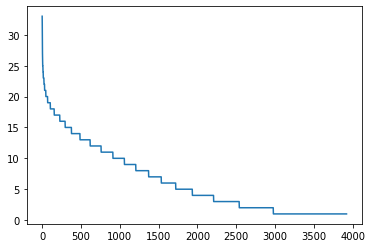

In [14]:
plt.plot(np.array(player_counts))

Видно, что большинство игроков (около75%) повторяются. Кратносто повтроения сильно варьируется. Есть небольшое количество игроков, повторяющихся более 20 раз. Основная часть повторяется порядка десятка раз. В связи с этим трудно определить сценарий агрегирования (какие агрегирующие функции брать, а также к каким метрикам применять) безотносительно к конкретной задаче моделирования (скажем, классификации, пока неопределеня даже целевая функция). 
<b>Поэтому на данном этапе оставим таблицу как есть, а преобразования параметров будем применять ко всем строкам с одинаковыми игроками (ипостасям игроков)</b>

In [15]:
TAB.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24691 entries, 0 to 24690
Data columns (total 58 columns):
Player         24624 non-null object
height         24624 non-null float64
weight         24624 non-null float64
collage        22401 non-null object
born           24624 non-null float64
birth_city     22978 non-null object
birth_state    22935 non-null object
Year           24624 non-null float64
Pos            24624 non-null object
Age            24616 non-null float64
Tm             24624 non-null object
G              24624 non-null float64
GS             18233 non-null float64
MP             24138 non-null float64
PER            24101 non-null float64
TS%            24538 non-null float64
3PAr           18839 non-null float64
FTr            24525 non-null float64
ORB%           20792 non-null float64
DRB%           20792 non-null float64
TRB%           21571 non-null float64
AST%           22555 non-null float64
STL%           20792 non-null float64
BLK%           20792 no

Видно, что есть всего пять (кроме колонки "Player") категориальных признаков, остальные - числовые, при этом два из них (blanl и blank2) пустые и могут быть опущены. Кроме того, признаки "born" и "Age" преобразовывать не будем. План преобразования таков: 1) заполняем пропуски категориальных признаков значениями "NAN"; 2) пропуски числовых признаков заполняем медианами распределений; 3) затем к категориальным признакам применяем бинаризацию (поскольку она более экономна в сравнении с One hot encoding, т.к. множит признаки логарифмически по множеству уникальных категорий, в то время как последний - линейно); 4) к получившимся числовым (кроме года) применим нормализацию.

In [16]:
cat = ["collage", "birth_city", "birth_state", "Pos", "Tm"]

In [17]:
num = np.array(TAB.columns.difference(cat + ["Player", "Year", "blanl", "blank2", "born", "Age"]))

#### 1. Заполняем пропуски категориальных признаков

In [18]:
for col in cat:
    TAB[col].fillna("NAN", inplace = True)

#### 2. Заполняем пропуски числовых признаков

In [19]:
for col in num:
    TAB[col].fillna(TAB[col].median(), inplace = True)

#### 3. Бинаризуем категориальне признаки

In [20]:
# pip install category_encoders

In [21]:
import category_encoders as ce

In [22]:
TAB_cat = TAB[cat].copy()

In [23]:
encoder = ce.BinaryEncoder(cols=cat)
TAB_cat_bin = encoder.fit_transform(TAB_cat)

In [24]:
TAB_cat_bin.head()

collage_0  collage_1  collage_2  collage_3  collage_4  collage_5  \
0          0          0          0          0          0          0   
1          0          0          0          0          0          0   
2          0          0          0          0          0          0   
3          0          0          0          0          0          0   
4          0          0          0          0          0          0   

   collage_6  collage_7  collage_8  collage_9  ...  Pos_4  Pos_5  Tm_0  Tm_1  \
0          0          0          0          1  ...      0      1     0     0   
1          0          0          0          1  ...      0      1     0     0   
2          0          0          1          0  ...      1      0     0     0   
3          0          0          1          0  ...      1      0     0     0   
4          0          0          1          0  ...      1      0     0     0   

   Tm_2  Tm_3  Tm_4  Tm_5  Tm_6  Tm_7  
0     0     0     0     0     0     1  
1     0     0     0     0     0     1  
2     0     0     0     0     1     0  
3     0     0     0     0     1     0  
4     0     0     0     0     1     0  

[5 rows x 45 columns]

Оставим таблицу TAB_cat_bin как есть (не будем объединять ее с основной таблицей TAB), поскольку бинаризация не всегда уместна, в ряде случаев категориальные признаки вполне пригодны как есть. А для формирования матрицы признаков, нужна конкретизация модели и фича-селекшн, так что объединение таблиц можно отнести к этим этапам.

#### 4. Нормализуем числовые признаки

In [25]:
from sklearn import preprocessing as preproc

In [26]:
for col in num:
    TAB[col] = preproc.normalize([TAB[col]])[0]

In [27]:
TAB.head()

Player    height    weight                 collage    born  \
0  Curly Armstrong  0.005737  0.005090      Indiana University  1918.0   
1  Curly Armstrong  0.005737  0.005090      Indiana University  1918.0   
2     Cliff Barker  0.005992  0.005486  University of Kentucky  1921.0   
3     Cliff Barker  0.005992  0.005486  University of Kentucky  1921.0   
4     Cliff Barker  0.005992  0.005486  University of Kentucky  1921.0   

  birth_city birth_state    Year  Pos   Age  ...       FT%      ORB       DRB  \
0        NAN         NAN  1950.0  G-F  31.0  ...  0.006117  0.00283  0.003463   
1        NAN         NAN  1951.0  G-F  32.0  ...  0.005587  0.00283  0.003463   
2   Yorktown     Indiana  1950.0   SG  29.0  ...  0.006143  0.00283  0.003463   
3   Yorktown     Indiana  1951.0   SG  30.0  ...  0.005631  0.00283  0.003463   
4   Yorktown     Indiana  1952.0   SG  31.0  ...  0.005102  0.00283  0.003463   

        TRB       AST       STL       BLK       TOV        PF       PTS  
0  0.003179  0.006303  0.003529  0.001712  0.003771  0.009598  0.004113  
1  0.001779  0.002758  0.003529  0.001712  0.003771  0.004291  0.001814  
2  0.003179  0.003904  0.003529  0.001712  0.003771  0.004379  0.002506  
3  0.001999  0.004119  0.003529  0.001712  0.003771  0.004335  0.001365  
4  0.001619  0.002507  0.003529  0.001712  0.003771  0.002477  0.001132  

[5 rows x 58 columns]